ЗАДАЧИ

1) Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Данные для построения графика хранятся здесь.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
step_1 = pd.read_csv('C:/Users/1/step_1_lesson_7.csv')
step_1

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


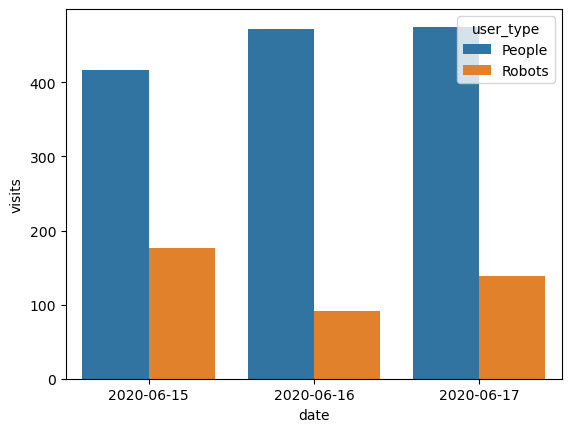

In [14]:
sns.barplot(x='date', y='visits', data=step_1, hue = 'user_type')
plt.show()

2) Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.
Ответ округлите до целого.

In [257]:
step_3 = pd.read_csv('C:/Users/1/step_3_lesson_7.csv')
step_3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [269]:
round(step_3.groupby('browser').agg({'visits':'sum'}).loc['Google Chrome' , 'visits' ] / step_3.visits.sum() * 100)


60

3) Вот файл с данными посещаемости сайта Яндекс.Метрика. Создайте серию в которую будет записана 1, если посещение робота с браузера Chrome и 0 в других случаях. Получившуюся серию поместите в chrome_robots

In [28]:
import numpy as np

In [41]:
step_3 = pd.read_csv('C:/Users/1/step_3_lesson_7.csv')
step_3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


При использовании амперсанда & сравниваемое помещается в СКОБКИ 

In [53]:
(step_3.user_type == 'Robots') & (step_3.browser.str.contains('Chrome')) # contains() для быстрого поиска наличия чего-либо внутри контейнера

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
dtype: bool

In [77]:
np.where((step_3.user_type == 'Robots') & (step_3.browser.str.contains('Chrome'))) # np.where вернет индексы элементов, удовлетворяющих условию.

(array([1], dtype=int64),)

In [70]:
chrome_robots = np.where((step_3.user_type == 'Robots') & (step_3.browser.str.contains('Chrome')),1,0) # вернёт списком 1 если True и 0 если False
chrome_robots

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [72]:
chrome_robots = pd.Series(chrome_robots)  # помещаем список в pd серию 
chrome_robots

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int32

Для переименования значений в переменной-списке или другом итерируемом объекте часто используют функцию map()

In [79]:
step_3.user_type.map({'People':'Humans', 'Robots':'Bots'})

0     Humans
1       Bots
2     Humans
3       Bots
4     Humans
5     Humans
6       Bots
7     Humans
8     Humans
9     Humans
10    Humans
11      Bots
12      Bots
13      Bots
14    Humans
15      Bots
16    Humans
17    Humans
18      Bots
19    Humans
20    Humans
21      Bots
22    Humans
23      Bots
Name: user_type, dtype: object

In [93]:
numbers = [1,2,3,4,5]
res = list(map(lambda x: x * 2, numbers))
res

[2, 4, 6, 8, 10]

4) Давайте выясним, с какого браузера приходит БОЛЬШЕ всего ботов. Посмотрите на данные и определите, у какого браузера самая БОЛЬШАЯ доля посещений сайта ботами от общего числа посещений?
В качестве ответа укажите название браузера.

In [135]:
step_3 = pd.read_csv('C:/Users/1/step_3_lesson_7.csv')
step_3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [137]:
visit_vs_browser = step_3.groupby('browser', as_index = False).agg({'visits':'sum'})  # число визитов с каждого браузера
visit_vs_browser.head()

,browser,visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0


In [139]:
full_df=step_3.merge(visit_vs_browser, 
             on = 'browser',
             suffixes=('_type','_all'))# обьединили таблицы по ключу browser и сразу переименовали столбцы
full_df.head()

,date,browser,user_type,visits_type,visits_all
0,2020-06-15,Google Chrome,People,250.0,354.0
1,2020-06-15,Google Chrome,Robots,104.0,354.0
2,2020-06-15,Yandex Browser,People,47.0,54.0
3,2020-06-15,Firefox,Robots,31.0,58.0
4,2020-06-15,Chrome Mobile,People,31.0,31.0


In [141]:
full_df['proportion'] = full_df.visits_type / full_df.visits_all
full_df.head()

,date,browser,user_type,visits_type,visits_all,proportion
0,2020-06-15,Google Chrome,People,250.0,354.0,0.706215
1,2020-06-15,Google Chrome,Robots,104.0,354.0,0.293785
2,2020-06-15,Yandex Browser,People,47.0,54.0,0.870370
3,2020-06-15,Firefox,Robots,31.0,58.0,0.534483
4,2020-06-15,Chrome Mobile,People,31.0,31.0,1.000000


In [153]:
full_df.query('user_type == "Robots"') \
    .nlargest(1,columns = 'proportion')# вернулась строка с максимальным значением в нужной колонке

,date,browser,user_type,visits_type,visits_all,proportion
13,2020-06-15,UCWEB,Robots,4.0,4.0,1.0


5) Сагрегируйте данные по дню, типу пользователя, браузеру, создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.
В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.
Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [156]:
step_4 = pd.read_csv('C:/Users/1/step_4_lesson_7.csv')
step_4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [164]:
step_4.duplicated(['date','browser','user_type']).any() # посмотреть дубликаты строк, их нет, поэтому нет смысла группировать

False

In [174]:
step_4['percent'] = step_4.visits / step_4.visits.sum() *100 # находим отношение каждой строки к общему количеству визитов
step_4.head()

,date,browser,user_type,visits,percent
0,2020-06-15,Google Chrome,People,250.0,42.087542
1,2020-06-15,Google Chrome,Robots,104.0,17.508418
2,2020-06-15,Yandex Browser,People,47.0,7.912458
3,2020-06-15,Firefox,Robots,31.0,5.218855
4,2020-06-15,Chrome Mobile,People,31.0,5.218855


In [180]:
step_4.query('user_type == "People" and browser == "Safari"')

,date,browser,user_type,visits,percent
7,2020-06-15,Safari,People,19.0,3.198653


6) При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи vk api себе в личку ВКонтакте. 

In [183]:
import gspread
from df2gspread import df2gspread as d2g   # заливать пандасовский датафрейм в гугл документы
from oauth2client.service_account import ServiceAccountCredentials # чтобы авторизоваться

In [185]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']    # набор прав который передаем скрипту ходить в гугл документы и на гугл диск
my_mail = 'eburkovskaya1987@gmail.com'

# авторизация
credentials = ServiceAccountCredentials.from_json_keyfile_name('my-project-091225-480716-f16e0ebc56d5.json', scope)   # файл json сгенерила на GoogleCloud при создании сервисного аккаунта
gs = gspread.authorize(credentials)

In [207]:
table_name = 'A new table' # название таблицы
table = gs.open(table_name)

SpreadsheetNotFound: <Response [200]>

In [ ]:
#gs.create(table_name)

In [211]:
table.share(my_mail, perm_type='user',role='writer')

<Response [200]>

In [213]:
sheet_name = 'list1'

In [217]:
d2g.upload(step_4, table_name, sheet_name, credentials=credentials, row_names=True )# создать новую таблицу в гугл и сохранить в нее наш предыдущий датафрйм

HttpError: <HttpError 403 when requesting https://www.googleapis.com/drive/v3/files?fields=id&alt=json returned "The user's Drive storage quota has been exceeded.">

In [295]:
with open ('my-project-091225-480716-f16e0ebc56d5.json') as src:
        credentials = json.load(src)# считываем файлик

In [277]:
token = credentials['token_uri']

In [279]:
import vk_api

In [281]:
chat_id = 1

In [285]:
vk_session = vk_api.VkApi(token=token)
vk_session

In [287]:
vk = vk_session.get_api()

In [291]:
vk.messages.send(chat_id = chat_id, random_id = np.random.randint(0,2**31), message = 'привет' )

ApiError: [1116] Anonymous token is invalid

7. Другой аналитик уже агрегировал часть данных из метрики, и вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.
В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [313]:
#Вот так можно прочитать данные другого аналитика:
from io import BytesIO 
import requests 
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv') 
data = r.content

df2 = pd.read_csv(BytesIO(data))
df2.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [315]:
df = pd.read_csv('C:/Users/1/step_4_lesson_7.csv')
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [325]:
full_data = df.merge(df2, on = ['date','browser', 'user_type'])
full_data

,date,browser,user_type,visits,users
0,2020-06-15,Google Chrome,People,250.0,240.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0
2,2020-06-15,Yandex Browser,People,47.0,44.0
3,2020-06-15,Firefox,Robots,31.0,29.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0
5,2020-06-15,Firefox,People,27.0,26.0
6,2020-06-15,Safari,Robots,22.0,20.0
7,2020-06-15,Safari,People,19.0,17.0
8,2020-06-15,Mobile Safari,People,15.0,14.0
9,2020-06-15,Opera,People,11.0,10.0


In [331]:
full_data['percent'] = full_data.visits / full_data.users
full_data.query('browser == "Google Chrome" and user_type =="Robots"' )

,date,browser,user_type,visits,users,percent
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0


8. Загрузите данные из Google Sheets, которые находятся в папке (table - Лист1) при помощи библиотеки requests. Посчитайте процент мужчин среди всех посетителей сайта, округлите ответ до целых.
Воспользуйтесь этим кодом, чтобы перевести данные из реквеста в пандас

from io import BytesIO
import requests

req = requests.get(your_link)
data = req.content

df = pd.read_csv(BytesIO(data))

In [408]:
import pandas as pd
import requests
import numpy as np
from io import BytesIO# Input/Output считывает данные в сыром виде - в виде байтов

чтобы считать данные с помощью requests и поместить в датафрейм надо выполнить код

req = requests.get(your_link)  # ссылка по которой хотим считать

data = req.content

df = pd.read_csv(BytesIO(data))

In [381]:
df = pd.read_csv('C:/Users/1/table - ╨Ы┬о╨▒╨▓1.csv')
df

,date,gender,users
0,2020-06-14,Not specified,150
1,2020-06-14,male,117
2,2020-06-14,female,21


In [383]:
df.users / df.users.sum()

0    0.520833
1    0.406250
2    0.072917
Name: users, dtype: float64

In [404]:
df.loc[1,'users'] / df.users.sum()

0.40625

In [389]:
df.users.div(df.users.sum()) \
    .mul(100) \
    .round()

0    52.0
1    41.0
2     7.0
Name: users, dtype: float64

9. У вас есть датасет sample_ads.csv с данными о кликах и показах по объявлению, в этом датасете есть пропуски. Вычислите количество строк без пропусков в колонке click_type. Запишите ответ в переменную not_nan_count

    ad_id - id объявления
   
    user_id - id пользователя
   
    click_type - тип клика (клик по заголовку объявления, клик по центру)

In [416]:
df = pd.read_csv('C:/Users/1/sample_ads.csv')
df

,ad_id,user_id,click_type
0,12345,qwert,top
1,12345,fsssc,center
2,12345,vfvgg,NaN
3,12345,asrvv,NaN
4,12345,tynuy,top
5,12345,vreio,NaN
6,12345,oirbv,top
7,12345,kjvbe,NaN
8,12345,vkrej,center
9,12345,krjvb,top


In [418]:
df.click_type.isna().sum() # количество пропусков

7

In [432]:
(~df.click_type.isna()).sum() # применим not к каждой ячейке и получим количестов НЕ пропусков
df.click_type.notna().sum() # второй вариант кода

11

10.В списке lst находятся различные элементы. Создайте списк new_list и сделайте следующее:
- при помощи конструкции try except и цикла попробуйте преобразовать каждое значение в листе в int
- если это получилось - добавьте преобразованное значение  в список new_list

try except это способ перехвата ошибок в питоне

In [437]:
n = 0
species = 0

try:
    fraction = species / n # код который может выдать ошибку
except:
    print('failed') # что необходимо выполнить если try выдал ошибку

print('next_line')

failed
next_line


если в списке только числа в строковом формате, то можно применить int

In [443]:
lst = ['1','2','5','11']
new_lst = []

In [451]:
for element in lst:
    new_lst.append(int(element))

In [453]:
new_lst

[1, 2, 5, 11]

а если в списке есть строки с буквами, то нужен try except

In [475]:
lst = ['1','2','Hello_world','11']
new_lst = []

In [477]:
for element in lst:
    try:
        new_lst.append(int(element))
    except:
        continue # continue можно заменить на pass

In [479]:
lst

['1', '2', 'Hello_world', '11']

In [481]:
new_lst

[1, 2, 11]

11. А теперь попробуем воспользоваться знаниями использования Telegram API. Отправьте себе в личку любое послание, а в ответ к этому шагу напишите ник бота, от имени которого будете отправлять сообщения.

In [492]:
import json
from urllib.parse import urlencode

In [494]:
with open('C:/Users/1/telega.json') as src: # открыть файл (джейсон) as источник
    data = json.load(src)

In [496]:
token = data['token']
chat_id = data['chat_id']

In [498]:
message = 'owls are not what they seem'

params = {'chat_id': chat_id, 'text': message}

base_url = f'https://api/telegram.org/bot{token}/'   # начинаем взаимодействовать с нашим ботом
url = base_url + 'sendMessage?' + urlencode(params) # создаем ссылку где говорим, что хотим воспользоваться ботом, отправить сообщение, в такой чат с таким содержанием 

resp = requests.get(url)  # в resp вернётся ответ, как если бы мы вставили url вручную и нажали enter

ConnectionError: HTTPSConnectionPool(host='api', port=443): Max retries exceeded with url: /telegram.org/bot8409406774:AAHrqvVYcMSSFOvB-2Hu0Mf6J3wxLH7YNJs/sendMessage?chat_id=1&text=owls+are+not+what+they+seem (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000183CA7656A0>: Failed to resolve 'api' ([Errno 11001] getaddrinfo failed)"))